Done by Wong Wen Bing, 230436M

# **Part 1: Data Preparation and Understanding** 
This section will comprise of the data understanding and data preparation conducted

In [4]:
# pip install pandas seaborn nltk matplotlib openpyxl

In [1]:
# Import 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
# nltk.download('all')

Reading in data and understanding data

In [3]:
data=pd.read_excel('Data.xlsx')
data

,description,species
0,2 Jun 2023 ï¿½ The Javan myna shares some simi...,Javan Myna
1,Click here for more information about the Red ...,Collared Kingfisher
2,The black-headed oriole ( Oriolus larvatus) is...,Black-naped Oriole
3,"Search from thousands of royalty-free ""Javan M...",Javan Myna
4,521 foreground recordings and 156 background ...,Little Egret
...,...,...
737,"August 13, 2016 - HISTORICAL records show that...",Little Egret
738,File: Black-naped Oriole (Oriolus chinensis ch...,Black-naped Oriole
739,Larger than a Cattle Egret and with black leg...,Little Egret
740,22 Oct 2023 ï¿½ Dragon Snake (Javan Tubercle S...,Javan Myna


In [4]:
data.shape

(742, 2)

From the above, we can infer that there are 2 columns and a total of 742 rows

**Checking for null and duplicates**  
- there might be some empty values or duplicate values that we need to check for

In [5]:
data.isna().sum()

description    24
species         0
dtype: int64

In [6]:
dup=data.duplicated().value_counts()
print(f'''
duplicates: {dup[True]}
unique: {dup[False]}
''')


duplicates: 128
unique: 614



From the above output we can infer the below: 
*Null Values* 
- there are 24 null values

*Duplicate Values* 
- 

In [7]:
#drop null and duplicate values
data=data.dropna()
data=data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 611 entries, 0 to 739
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  611 non-null    object
 1   species      611 non-null    object
dtypes: object(2)
memory usage: 14.3+ KB


#### **Data Understanding** 
- To understand the distribution of data, I set out to do some visualisations to visualise the distribution of the dataset.

Firstly, we did a distribution of the species (the target variable in the dataset.)

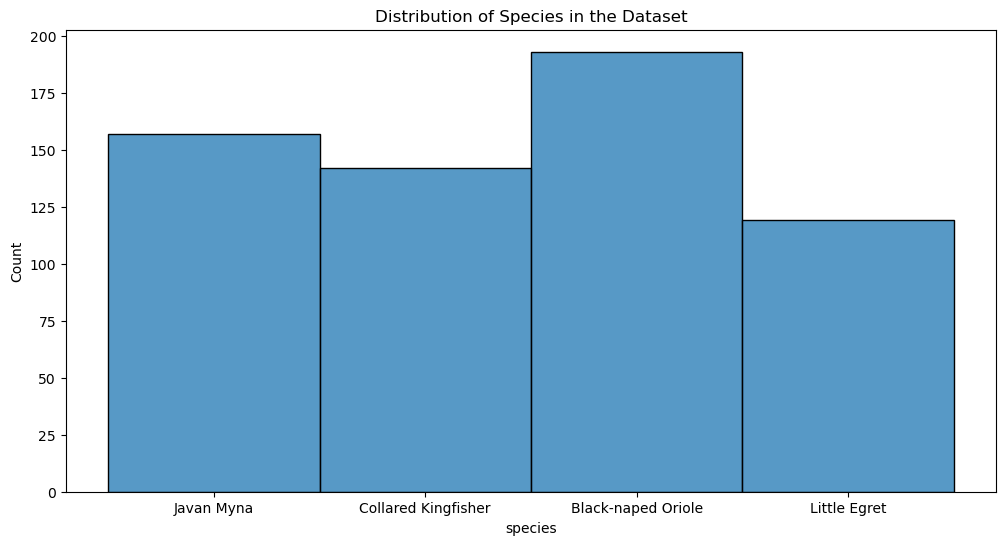

In [8]:
group=data.groupby(['species']).count()
plt.figure(figsize=(12, 6))  
sns.histplot(data['species'])
plt.title('Distribution of Species in the Dataset')
plt.show()

As we can see from above, we can realise that the Black-napled Oriole has the most records in the dataset. 
This means that there is a probability of biasedness in the dataset. 

Now, we are going to investigate the aaverage length of data in the dataset

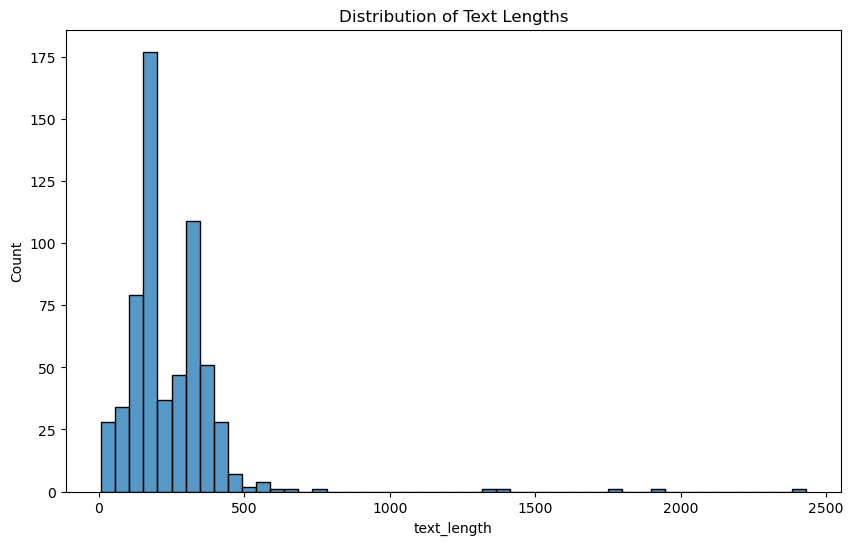

In [9]:
data['text_length'] = data['description'].apply(len)
plt.figure(figsize=(10,6))
sns.histplot(data['text_length'], bins=50)
plt.title('Distribution of Text Lengths')
plt.show()

## **Data Pre-Processing** 
- After examining the data, we now will conduct pre-processing of the data. The pre-processing steps include: 
1. removing of stopwords
2. removing special characters in word

In [10]:
from nltk.corpus import stopwords #stopwords
from gensim.parsing.porter import PorterStemmer #stemming
from nltk.stem import PorterStemmer #stemming
from nltk.stem.wordnet import WordNetLemmatizer #lemmatization

porter_stemmer = PorterStemmer() #stemming
lemma=WordNetLemmatizer() #lemmatization
stopwordss=stopwords.words('english') #list of stopwords
# exclude=set(string.punctuation) #punctuations

def preprocess_text(text):
    stopwordss=list(stopwords.words('english'))
    text = text.lower()  # Convert to lowercase
    # text = re.sub(r'\w*\d\w*', '', text)  # Remove words with numbers
    # text = re.sub(r'\W+', ' ', text)  # Remove special characters
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s\s+',' ', text)
    words=word_tokenize(text)
    text=[]
    for word in words: 
        if word not in stopwordss: 
            normalized = lemma.lemmatize(word)
            stemmed = porter_stemmer.stem(word) #stemming
            text.append(stemmed)
    return ' '.join(text)
data['cleaned_text']=''
data.head()

,description,species,text_length,cleaned_text
0,2 Jun 2023 ï¿½ The Javan myna shares some simi...,Javan Myna,162,
1,Click here for more information about the Red ...,Collared Kingfisher,398,
2,The black-headed oriole ( Oriolus larvatus) is...,Black-naped Oriole,349,
3,"Search from thousands of royalty-free ""Javan M...",Javan Myna,177,
4,521 foreground recordings and 156 background ...,Little Egret,112,


In [11]:
# Apply preprocessing
data['cleaned_text'] = data['description'].apply(lambda x: preprocess_text(x))
data.head()

,description,species,text_length,cleaned_text
0,2 Jun 2023 ï¿½ The Javan myna shares some simi...,Javan Myna,162,jun javan myna share similar common myna term ...
1,Click here for more information about the Red ...,Collared Kingfisher,398,click inform red list categori criteria justif...
2,The black-headed oriole ( Oriolus larvatus) is...,Black-naped Oriole,349,black head oriol oriolu larvatu speci bird fam...
3,"Search from thousands of royalty-free ""Javan M...",Javan Myna,177,search thousand royalti free javan myna stock ...
4,521 foreground recordings and 156 background ...,Little Egret,112,foreground record background record egretta ga...


Investigating word count

In [12]:
# pip install wordcloud

In [24]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
txt=data['cleaned_text'].tolist() #convert dataframe columns to list
txt

['jun javan myna share similar common myna term physic appear howev distinguish frontal',
 'click inform red list categori criteria justif red list categori speci extrem larg rang henc approach threshold vulner rang size criterion extent occurr km combin declin fluctuat rang size habitat extent qualiti popul size small number',
 'black head oriol oriolu larvatu speci bird famili oriolida found africa strike appear bright yellow bodi contrast black head flesh colour beak taxonomi systemat edit author consid mountain oriol subspeci black head',
 'search thousand royalti free javan myna stock imag video next project download royalti free stock photo vector hd footag adob stock',
 'foreground record background record egretta garzetta total record durat',
 'littl egret egretta garzetta small white heron belong famili ardeida littl egret distribut asia indian subcontin europ africa australia',
 'survey record slight increas speci breed wild',
 'handbook bird world aliv seri first work ever i

In [25]:
txts=[]
for words in txt: 
    words=word_tokenize(word)
    txts.append(' '.join(words))
print(txts)
freq_dist=FreqDist(txt) #calculate frequency of words that should be a list
freq_dist.plot(50, cumulative=False) #generate freq distribution plot 
cloud=WordCloud().generate_from_frequencies(freq_dist) #generate word cloud
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'word' is not defined

In [15]:
data.to_csv('230436M_cleaned_data.csv')

Feature Engineering

In [16]:
X = data['cleaned_text']
Y= data['species']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)
X_train

508    jul rufou collar kingfish rufou collar kingfis...
152    understand genet basi converg broad phylogenet...
688    hong kong bird watch societi hkbw initi first ...
220    apr collar kingfish todirhamphu chlori commonl...
184    content introduct littl owl frankfurt germani ...
                             ...                        
79     larg coastal kingfish gleam white head thin bl...
352    giant kingfish trail follow jungli river reach...
241    collar kingfish feed mainli insect small repti...
61     altamira oriol audubon oriol robert mcquad aud...
682    khor kalba conserv reserv manag environ protec...
Name: cleaned_text, Length: 427, dtype: object

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(stop_words='english', ngram_range=(1,1))
X_train_cv=cv.fit_transform(X_train)
X_test_cv=cv.transform(X_test) #make sure X_test is TRANSFORM and not fit_transform

#print dimensions and features 
print(f"""
training: {X_train_cv.toarray().shape}
test: {X_test_cv.toarray().shape}

features: {cv.get_feature_names_out()}
      """)


training: (427, 2370)
test: (184, 2370)

features: ['aa' 'abil' 'abl' ... 'zebra' 'zimbabw' 'zoonos']
      


In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='lbfgs')

#train
lr.fit(X_train_cv, y_train)

#apply to test
y_pred_cv=lr.predict(X_test_cv)
y_pred_cv

array(['Javan Myna', 'Javan Myna', 'Collared Kingfisher',
       'Collared Kingfisher', 'Collared Kingfisher', 'Black-naped Oriole',
       'Javan Myna', 'Collared Kingfisher', 'Javan Myna', 'Javan Myna',
       'Black-naped Oriole', 'Black-naped Oriole', 'Black-naped Oriole',
       'Little Egret', 'Black-naped Oriole', 'Little Egret',
       'Collared Kingfisher', 'Black-naped Oriole', 'Black-naped Oriole',
       'Collared Kingfisher', 'Little Egret', 'Black-naped Oriole',
       'Black-naped Oriole', 'Black-naped Oriole', 'Javan Myna',
       'Collared Kingfisher', 'Black-naped Oriole', 'Collared Kingfisher',
       'Javan Myna', 'Little Egret', 'Collared Kingfisher',
       'Black-naped Oriole', 'Collared Kingfisher', 'Collared Kingfisher',
       'Javan Myna', 'Javan Myna', 'Javan Myna', 'Collared Kingfisher',
       'Black-naped Oriole', 'Collared Kingfisher', 'Black-naped Oriole',
       'Javan Myna', 'Javan Myna', 'Black-naped Oriole', 'Javan Myna',
       'Black-naped Oriole'

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_cv)
cm

array([[57,  0,  1,  0],
       [ 1, 41,  1,  0],
       [ 2,  0, 45,  0],
       [ 7,  0,  2, 27]], dtype=int64)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cv, target_names=['Black-naped Oriole','Collared Kingfisher','Javan Myna','Little Egret']))

                     precision    recall  f1-score   support

 Black-naped Oriole       0.85      0.98      0.91        58
Collared Kingfisher       1.00      0.95      0.98        43
         Javan Myna       0.92      0.96      0.94        47
       Little Egret       1.00      0.75      0.86        36

           accuracy                           0.92       184
          macro avg       0.94      0.91      0.92       184
       weighted avg       0.93      0.92      0.92       184



In [22]:
#MAIN DIFFERENCE IN CODE
from sklearn.naive_bayes import MultinomialNB

nb=MultinomialNB()

#train
nb.fit(X_train_cv, y_train)

#move to X_test
y_pred_cv=nb.predict(X_test_cv)
# y_pred_cv

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_cv)
cm

array([[57,  0,  1,  0],
       [ 1, 41,  1,  0],
       [ 2,  1, 44,  0],
       [ 6,  0,  4, 26]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cv, target_names=['Black-naped Oriole','Collared Kingfisher','Javan Myna','Little Egret']))

                     precision    recall  f1-score   support

 Black-naped Oriole       0.78      0.98      0.87        58
Collared Kingfisher       0.95      0.88      0.92        43
         Javan Myna       0.94      0.94      0.94        47
       Little Egret       1.00      0.67      0.80        36

           accuracy                           0.89       184
          macro avg       0.92      0.87      0.88       184
       weighted avg       0.90      0.89      0.88       184



In [ ]:
#MAIN DIFFERENCE IN CODE
from sklearn import svm

supportvector=svm.LinearSVC()
#train
supportvector.fit(X_train_cv, y_train)

#move to X_test
y_pred_cv=supportvector.predict(X_test_cv)
# y_pred_cv

C:\Users\wongw\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_cv)
cm

array([[55,  1,  1,  1],
       [ 3, 39,  0,  1],
       [ 0,  1, 46,  0],
       [ 6,  0,  3, 27]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cv, target_names=['Black-naped Oriole','Collared Kingfisher','Javan Myna','Little Egret']))

                     precision    recall  f1-score   support

 Black-naped Oriole       0.86      0.95      0.90        58
Collared Kingfisher       0.95      0.91      0.93        43
         Javan Myna       0.92      0.98      0.95        47
       Little Egret       0.93      0.75      0.83        36

           accuracy                           0.91       184
          macro avg       0.92      0.90      0.90       184
       weighted avg       0.91      0.91      0.91       184



In [ ]:
testset=pd.read_excel('Data_test.xlsx')
testset.head()

,description,species
0,Looking for fun and interesting facts about a ...,Black-naped Oriole
1,Giant Panda. Grey Wolf. Canis lupus. Proboscis...,Black-naped Oriole
2,javanicus displayed during feeding such as wal...,Javan Myna
3,Black-naped Oriole: Explore more topics. Name;...,Black-naped Oriole
4,NaN,Javan Myna


In [ ]:
testset.drop_duplicates(inplace=True)
testset.dropna(inplace=True)
testset['cleaned_text'] = testset['description'].apply(preprocess_text)
testset.head()

,description,species,cleaned_text
0,Looking for fun and interesting facts about a ...,Black-naped Oriole,looking for fun and interesting facts about a ...
1,Giant Panda. Grey Wolf. Canis lupus. Proboscis...,Black-naped Oriole,giant panda grey wolf canis lupus proboscis mo...
2,javanicus displayed during feeding such as wal...,Javan Myna,javanicus displayed during feeding such as wal...
3,Black-naped Oriole: Explore more topics. Name;...,Black-naped Oriole,blacknaped oriole explore more topics name des...
5,"The Javan myna, also known as the white-vented...",Javan Myna,the javan myna also known as the whitevented m...


In [ ]:
test=testset['cleaned_text'].to_list()
print(test)
vector=cv.transform(test)
testset['log_reg_pred']=(lr.predict(vector))[0]

['looking for fun and interesting facts about a blacknaped oriole learn about this amazing bird and discover other animals from tiny insects to giant mammals', 'giant panda grey wolf canis lupus proboscis monkey western gorilla gorilla gorilla scarlet macaw ara macao basic facts about blackhooded oriole lifespan distribution and habitat map lifestyle and social behavior mating habits diet and nutrition population size and status ', 'javanicus displayed during feeding such as walking jumping hopping gleaning running short flying voicing looking around and feather fluffing a', 'blacknaped oriole explore more topics name descriptiondescription male overall bright yellow plumage with nape and wing tips black female like male but', 'the javan myna also known as the whitevented myna is a species of myna it is a member of the starling family it is native to bali and java it has been introduced to other asian countries and as far away as puerto rico', 'dont worry its not a typo error it is tru

In [ ]:
testset.head()

,description,species,cleaned_text,log_reg_pred
0,Looking for fun and interesting facts about a ...,Black-naped Oriole,looking for fun and interesting facts about a ...,Black-naped Oriole
1,Giant Panda. Grey Wolf. Canis lupus. Proboscis...,Black-naped Oriole,giant panda grey wolf canis lupus proboscis mo...,Black-naped Oriole
2,javanicus displayed during feeding such as wal...,Javan Myna,javanicus displayed during feeding such as wal...,Black-naped Oriole
3,Black-naped Oriole: Explore more topics. Name;...,Black-naped Oriole,blacknaped oriole explore more topics name des...,Black-naped Oriole
5,"The Javan myna, also known as the white-vented...",Javan Myna,the javan myna also known as the whitevented m...,Black-naped Oriole


In [ ]:
testset['naive_bayes_pred']=(nb.predict(vector))[0]

In [ ]:
testset.to_excel('Tested_set.xlsx')

In [ ]:
def accuracy(df): 
    # Calculate True Positives (TP): cases where prediction matches the actual species
    correct_predictions = df['species'] == df['naive_bayes_pred']
    tp = correct_predictions.sum()
    
    # Calculate total records
    total_records = len(df)
    
    # Calculate accuracy
    accuracy = tp / total_records if total_records > 0 else 0
    
    # Calculate False Positives (FP): cases where the prediction is wrong
    false_positives = (~correct_predictions).sum()
    
    return accuracy
    
accuracy(testset)

0.41025641025641024